In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import numpy as np
import scipy.sparse as sp
import math

from kuramoto import *
from wilson_cowan import *

In [125]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

# Synchrony

In [228]:
N = 50
coupling_coefficient = .8
wcn = nazemi_jamali_network(N, random_edges=150, coupling_weight=coupling_coefficient)
# aE = 0.8
# θE = 2
# wcn.excitatory_firing_rate = lambda x: sigmoid(aE*(x - θE))
# aI = 0.8
# θI = 8
# wcn.inhibitory_firing_rate = lambda x: sigmoid(aI*(x - θI))

θE = -2
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)

wcn.excitatory_variance = .01
wcn.inhibitory_variance = 0
# wcn.E0 = np.random.random(N)/2 + .25
# wcn.I0 = np.random.random(N)/4 + .125

In [225]:
t_final = 20
ts, Es, Is = wcn.simulate(t_final, Δt = 1e-3)

In [226]:
kuramoto = kuramoto_measure(ts, Es.T)
print(f'Kuramoto: {average_kuramoto(ts, Es.T, time_span=(t_final/2, t_final), kuramoto=kuramoto)}')

Kuramoto: 0.8689583887747302


In [217]:
# kuramoto = kuramoto_measure(ts, Es.T, threshold_function = lambda series: np.quantile(series, .75))
# print(f'Kuramoto: {average_kuramoto(ts, Es.T, time_span=(t_final/2, t_final), kuramoto=kuramoto)}')

In [218]:
print(f'Pearson: {pearson_mean(ts, Es, time_span=(t_final/2, t_final))}')

Pearson: 0.20479378798841727


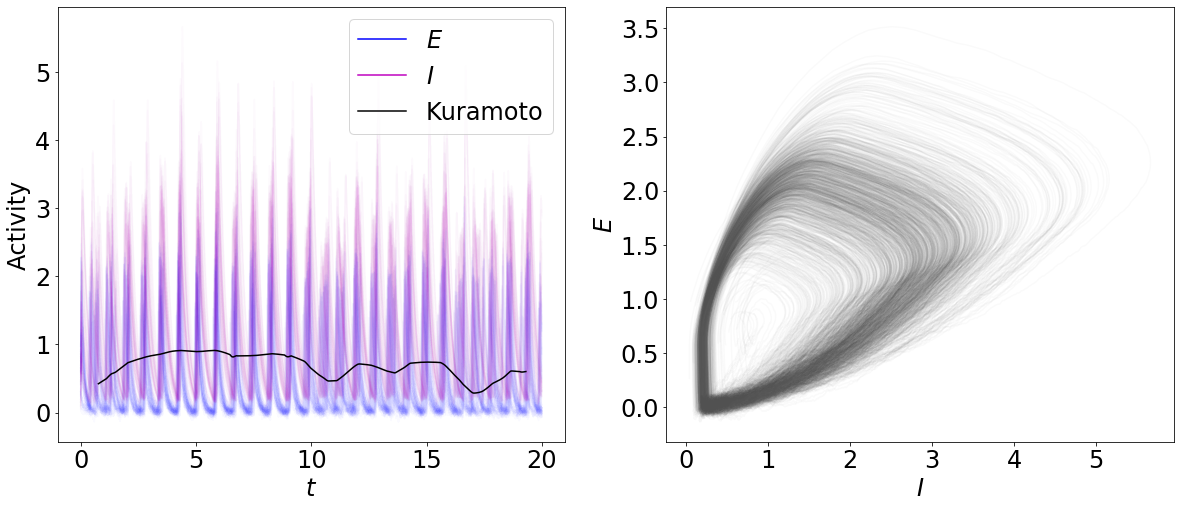

In [219]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [ ]:
frame_start = 0#len(ts)//2
frame_stop = len(ts)
frame_stride = 30

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
xs = np.cos(angles)
ys = np.sin(angles)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot(np.cos([angles[node] for node in edge]), np.sin([angles[node] for node in edge]), 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 200
shrink_factor = 1.1
scatter_plot_excitatory = ax.scatter(xs, ys, s=size, c=Es[0], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')
scatter_plot_inhibibory = ax.scatter(xs*shrink_factor, ys*shrink_factor, s=size, c=Is[0], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')

def animate(i):
    print(f'step {i}/{len(ts)}', end='\r')
    scatter_plot_excitatory.set_array(Es[i])
    scatter_plot_inhibibory.set_array(Is[i])
    return scatter_plot_excitatory,


# Init only required for blitting to give a clean slate.
def init():
    scatter_plot_excitatory.set_array(Es[0])
    scatter_plot_inhibibory.set_array(Is[0])
    return scatter_plot_excitatory,

anim = animation.FuncAnimation(fig, animate, np.arange(frame_start,frame_stop,frame_stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('PE_pulse.mp4', writer='imagemagick', fps=24)

plt.close()
HTML(anim.to_html5_video())

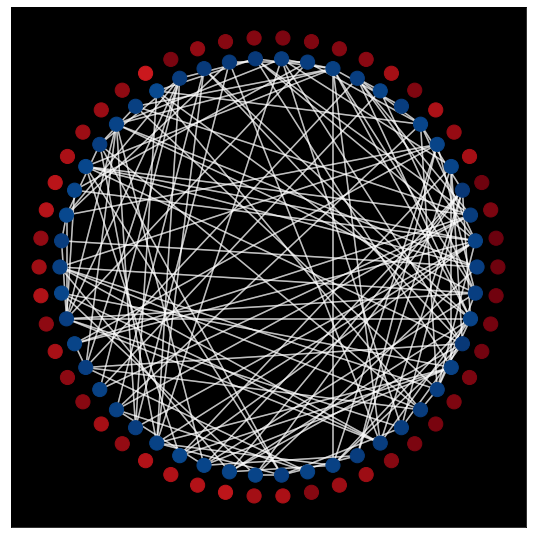

In [229]:
time_index = 6950

angles = np.linspace(0, 2*np.pi, N, endpoint=False)
xs = np.cos(angles)
ys = np.sin(angles)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot(np.cos([angles[node] for node in edge]), np.sin([angles[node] for node in edge]), 'w-', zorder=0, alpha=0.5)

size = 200
shrink_factor = 1.1
scatter_plot_excitatory = ax.scatter(xs, ys, s=size, c=Es[time_index], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')
scatter_plot_inhibibory = ax.scatter(xs*shrink_factor, ys*shrink_factor, s=size, c=Is[time_index], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')

plt.tight_layout()
plt.savefig('images/ring_100_percent_random.png')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [221]:
# presentation animation data
import pickle
# with open('raw_data/presentation_animation.pickle', 'wb') as f:
#     pickle.dump((ts, Es, Is, kuramoto), f)
    
# with open('raw_data/presentation_animation.pickle', 'rb') as f:
#     ts, Es, Is, kuramoto = pickle.load(f)

In [220]:
# animation settings
frame_start = 0#len(ts)//2
frame_stop = len(ts)
frame_stride = 10

# subplots
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# lower activity vs time
ax3.plot(ts, Es, 'b-', alpha=1/N)
ax3.plot([], [], 'b-', label='$E$')
ax3.plot(ts, Is, 'm-', alpha=1/N)
ax3.plot([], [], 'm-', label='$I$')
ax3.plot(ts, kuramoto, 'k-', label='Kuramoto')
ax3.set_xlabel('$t$')
ax3.set_ylabel('Activity')
ax3.legend(loc='upper right')

Is_max_val = np.max(Is)
time_slice, = ax3.plot([ts[0], ts[0]], [0, Is_max_val], 'k:')


# upper-left network animation
angles = np.linspace(0, 2*np.pi, N, endpoint=False)
xs = np.cos(angles)
ys = np.sin(angles)
ax1.set_facecolor('black')
ax1.set_xticks([])
ax1.set_yticks([])

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    ax1.plot(np.cos([angles[node] for node in edge]), np.sin([angles[node] for node in edge]), 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 150
shrink_factor = 1.1
scatter_plot_excitatory = ax1.scatter(xs, ys, s=size, c=Es[0], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')
scatter_plot_inhibibory = ax1.scatter(xs*shrink_factor, ys*shrink_factor, s=size, c=Is[0], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')

# upper-right phase plane
phase_scatter, = ax2.plot(Es[0], Is[0], 'ko', alpha=1/10)
E_max, E_min = np.max(Es), np.min(Es)
E_window = E_max - E_min
ax2.set_xlim(E_min - .1*E_window, E_max + .1*E_window)
I_max, I_min = np.max(Is), np.min(Is)
I_window = I_max - I_min
ax2.set_ylim(I_min - .1*I_window, I_max + .1*I_window)
ax2.set_xlabel('Excitatory')
ax2.set_ylabel('Inhibitory')

def animate(i):
    print(f'step {i}/{len(ts)}', end='\r')
    scatter_plot_excitatory.set_array(Es[i])
    scatter_plot_inhibibory.set_array(Is[i])
    time_slice.set_xdata([ts[i]]*2)
    phase_scatter.set_data(Es[i], Is[i])
    return scatter_plot_excitatory,

def init():
    scatter_plot_excitatory.set_array(Es[0])
    scatter_plot_inhibibory.set_array(Is[0])
    return scatter_plot_excitatory,

anim = animation.FuncAnimation(fig, animate, np.arange(frame_start,frame_stop,frame_stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('PE_pulse.mp4', writer='imagemagick', fps=24)

plt.close()
HTML(anim.to_html5_video())


# plt.show()

# Perc

In [9]:
n = 10
wcn, x_locations, y_locations = perc_network(n, coupling_weight=.8, random_edges = 0)
N = wcn.NE
θE = -1
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)
wcn.excitatory_variance = 0.1
wcn.inhibitory_variance = 0.1

In [10]:
ts, Es, Is = wcn.simulate(10, Δt = 1e-3)

In [11]:
kuramoto = kuramoto_measure(ts, Es.T)
print(f'Kuramoto: {average_kuramoto(ts, Es.T, time_span=(2, t_final), kuramoto=kuramoto)}')

Kuramoto: 0.4790611935231482


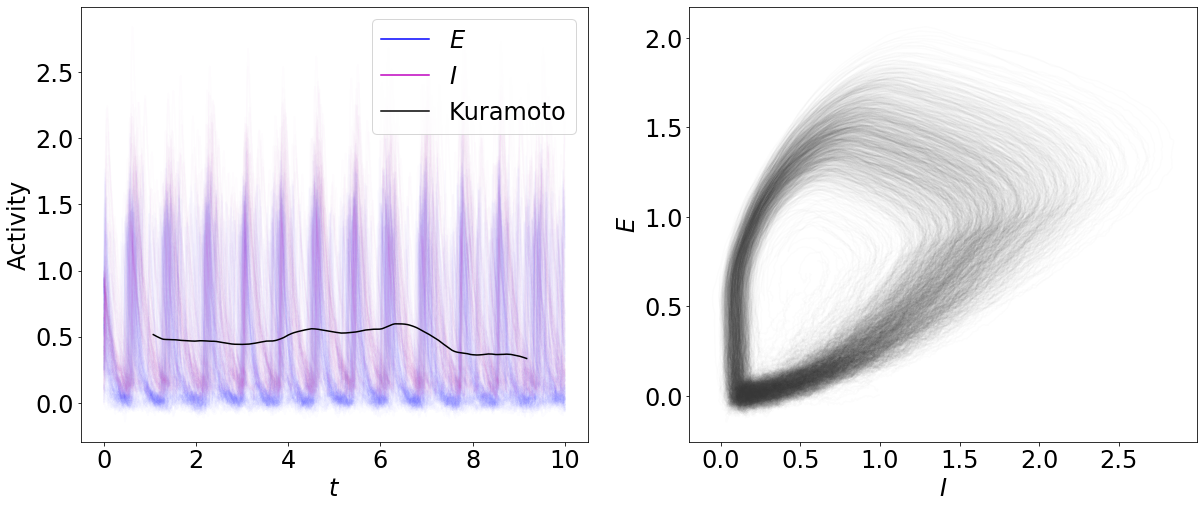

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [13]:
frame_start = 0#len(ts)//2
frame_stop = len(ts)#3*len(ts)//4
frame_stride = 30

X = np.array(x_locations)
Y = np.array(y_locations)

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot([x_locations[node] for node in edge], [y_locations[node] for node in edge], 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 200
shift = .2
scatter_plot_inhibibory = ax.scatter(X-shift, Y-shift, s=size, c=Is[0], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')
scatter_plot_excitatory = ax.scatter(X, Y, s=size, c=Es[0], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')


def animate(i):
    print(f'step {i}/{len(ts)}', end='\r')
    scatter_plot_excitatory.set_array(Es[i])
    scatter_plot_inhibibory.set_array(Is[i])
    return scatter_plot_excitatory,


# Init only required for blitting to give a clean slate.
def init():
    scatter_plot_excitatory.set_array(Es[0])
    scatter_plot_inhibibory.set_array(Is[0])
    return scatter_plot_excitatory,

anim = animation.FuncAnimation(fig, animate, np.arange(frame_start,frame_stop,frame_stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('PE_pulse.mp4', writer='imagemagick', fps=24)

plt.close()
HTML(anim.to_html5_video())

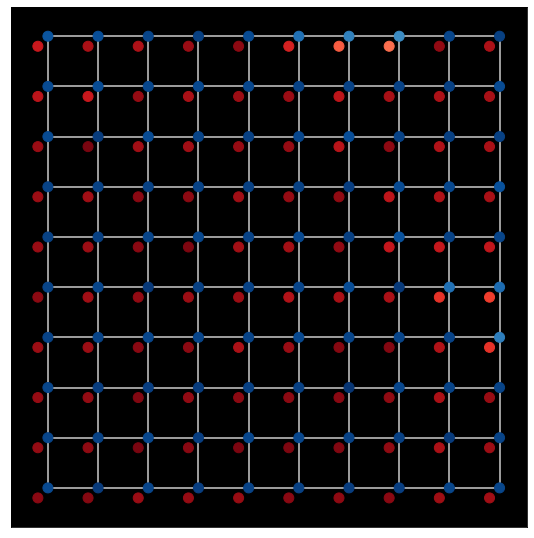

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

time_index = 6700

# plot edges
for edge in [ (a, b) for a, b in product(range(N),  range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot([x_locations[node] for node in edge], [y_locations[node] for node in edge], 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 100
shift = .2
scatter_plot_inhibibory = ax.scatter(X-shift, Y-shift, s=size, c=Is[time_index], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')
scatter_plot_excitatory = ax.scatter(X, Y, s=size, c=Es[time_index], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')


plt.tight_layout()

# plt.savefig('images/proposal_grid_pulse.png')

plt.show()

# Hexagons are the Bestagons

In [15]:
hex_radius = 3
wcn, x_locations, y_locations = hex_network(hex_radius, coupling_weight=.8, random_edges = 40)
N = wcn.NE

# aE = 0.8
# θE = 2
# wcn.excitatory_firing_rate = lambda x: sigmoid(aE*(x - θE))
# aI = 0.8
# θI = 8
# wcn.inhibitory_firing_rate = lambda x: sigmoid(aI*(x - θI))
θE = -1
θI = 8
wcn.excitatory_firing_rate = lambda x: relu(x - θE)
wcn.inhibitory_firing_rate = lambda x: relu(x - θI)

In [16]:
t_final = 20
ts, Es, Is = wcn.simulate(t_final, Δt=1e-3)

In [17]:
kuramoto = kuramoto_measure(ts, Es.T)
print(f'Kuramoto: {average_kuramoto(ts, Es.T, time_span=(2, t_final), kuramoto=kuramoto)}')

Kuramoto: 0.8618511832913226


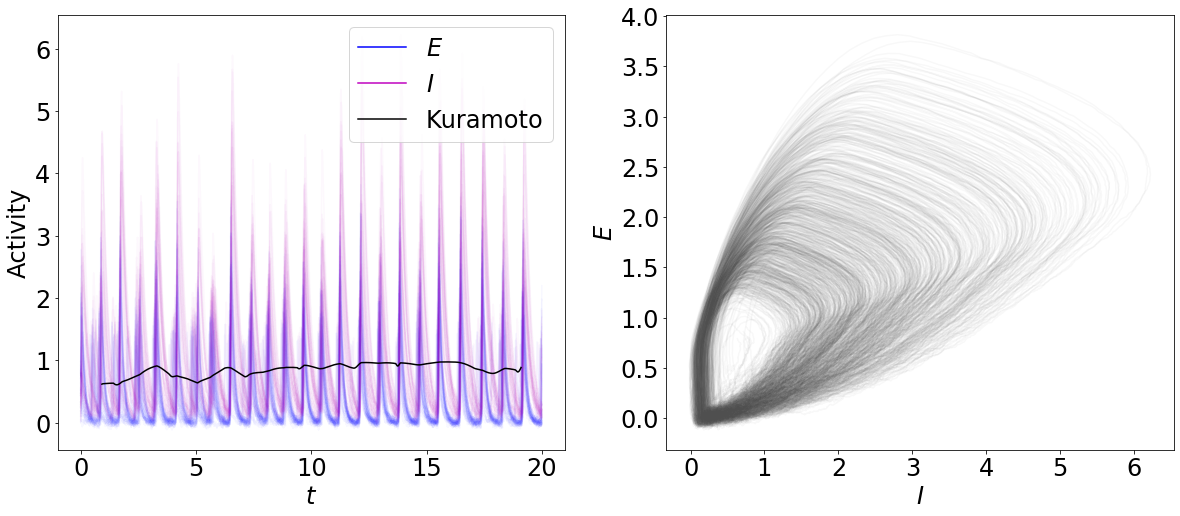

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')

plt.show()

In [28]:
X = np.array(x_locations) #+ np.random.randn(N)*.05
Y = np.array(y_locations) #+ np.random.randn(N)*.05

frame_start = 0#len(ts)//2
frame_stop = len(ts)#//10#3*len(ts)//4
frame_stride = 30

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.gca().set_aspect('equal', adjustable='box')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])

# plot edges
for edge in [ (a, b) for a, b in product(range(N), range(N)) if wcn.EE_mat[a, b]!=0]:
    plt.plot([X[node] for node in edge], [Y[node] for node in edge], 'w-', zorder=0, alpha=0.5)
# end plot edges
size = 200
shift = .2
scatter_plot_inhibibory = ax.scatter(X-shift, Y-shift, s=size, c=Is[0], vmin=np.min(Is), vmax=np.max(Is), cmap='Reds_r')
scatter_plot_excitatory = ax.scatter(X, Y, s=size, c=Es[0], vmin=np.min(Es), vmax=np.max(Es), cmap='Blues_r')


def animate(i):
    print(f'step {i}/{len(ts)}', end='\r')
    scatter_plot_excitatory.set_array(Es[i])
    scatter_plot_inhibibory.set_array(Is[i])
    return scatter_plot_excitatory,


# Init only required for blitting to give a clean slate.
def init():
    scatter_plot_excitatory.set_array(Es[0])
    scatter_plot_inhibibory.set_array(Is[0])
    return scatter_plot_excitatory,

anim = animation.FuncAnimation(fig, animate, np.arange(frame_start,frame_stop,frame_stride), init_func=init,
                              interval=1/24*1000, blit=True)

# anim.save('PE_pulse.mp4', writer='imagemagick', fps=24)

plt.close()
HTML(anim.to_html5_video())

# Phase Measure

In [60]:
series = Es[:,0]

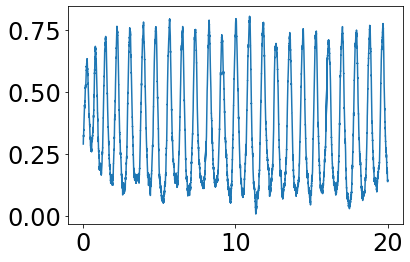

In [61]:
plt.plot(ts, series)

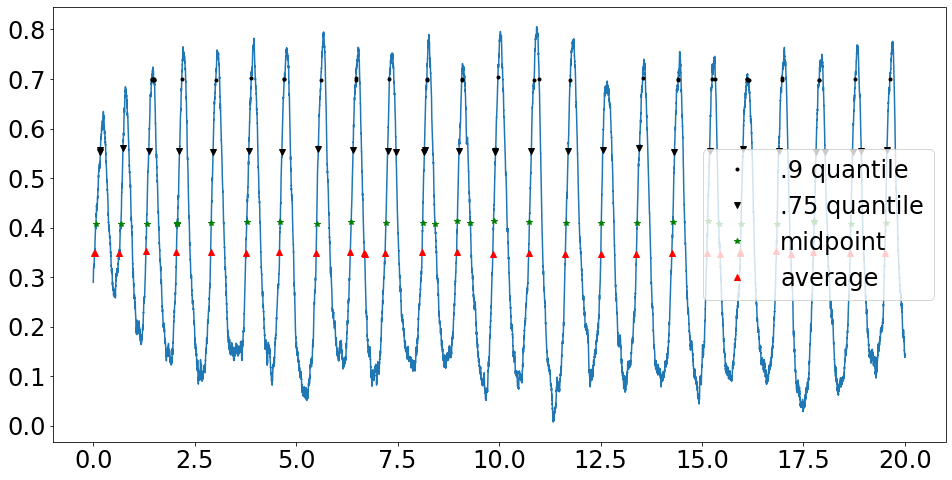

In [62]:
plt.figure(figsize=(16, 8))
plt.plot(ts, series)
spike_indices_approx = get_spike_indices_approx(ts, series, threshold_function=lambda series: np.quantile(series, .9))
plt.plot(ts[spike_indices_approx], series[spike_indices_approx], 'k.', label='.9 quantile')
spike_indices_approx = get_spike_indices_approx(ts, series, threshold_function=lambda series: np.quantile(series, .75))
plt.plot(ts[spike_indices_approx], series[spike_indices_approx], 'kv', label='.75 quantile')

spike_indices_approx = get_spike_indices_approx(ts, series, threshold_function=series_midpoint)
plt.plot(ts[spike_indices_approx], series[spike_indices_approx], 'g*', label='midpoint')

spike_indices_approx = get_spike_indices_approx(ts, series, threshold_function=np.average)
plt.plot(ts[spike_indices_approx], series[spike_indices_approx], 'r^', label='average')

plt.legend()
# plt.savefig('kuramoto_threshold_functions.png')

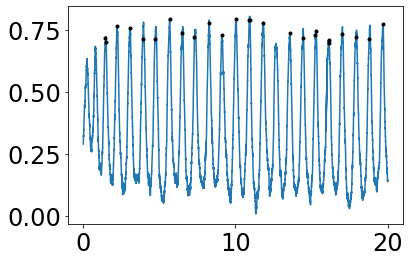

In [63]:
spike_indices = get_spike_indices(ts, series, quantile_90)
plt.plot(ts, series)
plt.plot(ts[spike_indices], series[spike_indices], 'k.')

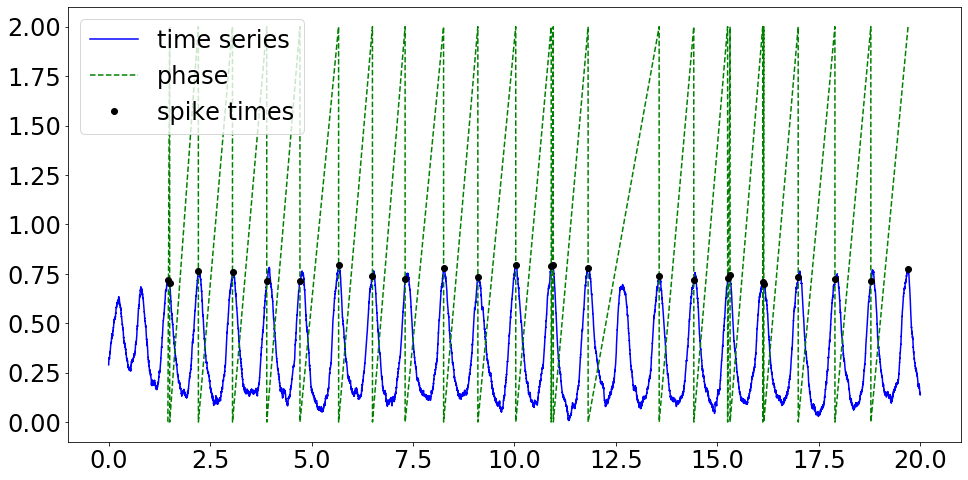

In [64]:
threshold_function = lambda series: np.quantile(series, .90)
spike_indices = get_spike_indices(ts, series, threshold_function)
phases = series_to_phase(ts, series, threshold_function)
plt.figure(figsize=(16, 8))
plt.plot(ts, series, 'b-', label='time series')
plt.plot(ts, np.array(phases) / np.pi, 'g--', label='phase')
plt.plot(ts[spike_indices], series[spike_indices], 'ko', label='spike times')
plt.legend()
plt.show()

In [26]:
kuramoto = kuramoto_measure(ts, Es.T)

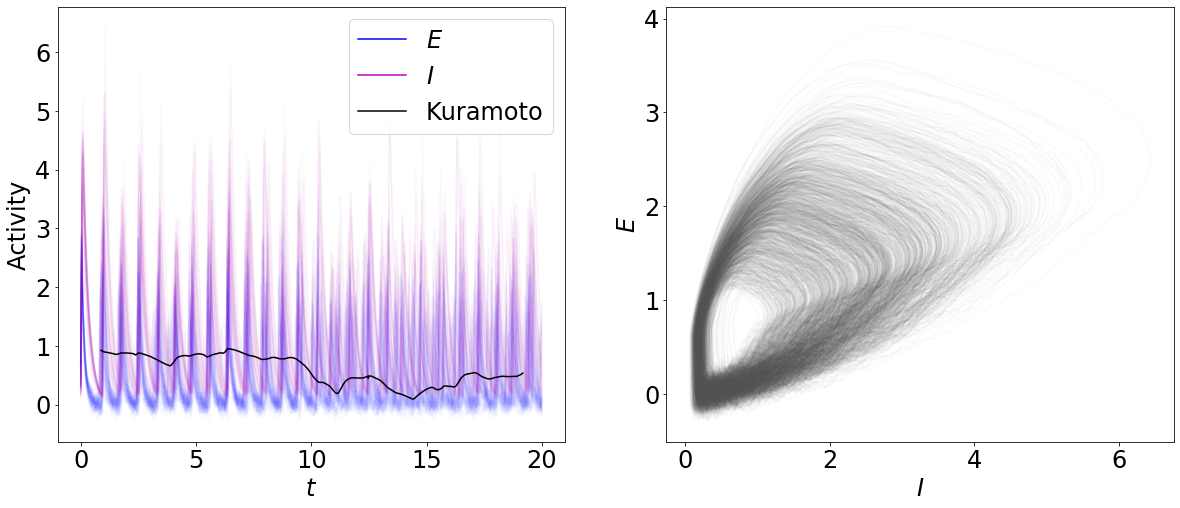

In [27]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(ts, Es, 'b-', alpha=1/N)
plt.plot([], [], 'b-', label='$E$')
plt.plot(ts, Is, 'm-', alpha=1/N)
plt.plot([], [], 'm-', label='$I$')
plt.plot(ts, kuramoto, 'k-', label='Kuramoto')
plt.xlabel('$t$')
plt.ylabel('Activity')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(Is, Es, 'k', alpha=1/N)
plt.xlabel('$I$')
plt.ylabel('$E$')
# plt.savefig('kuramoto_test1.png')
plt.show()

average = 0.848308165844444


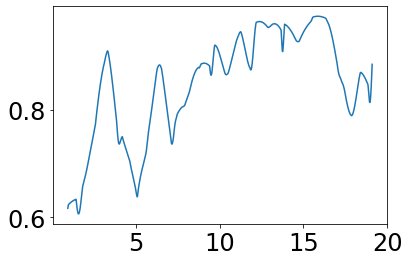

In [27]:
plt.plot(ts, kuramoto)
print(f'average = {average_kuramoto(ts, Es.T, kuramoto=kuramoto)}')